Name: Mayuresh Shitole (ms22971)
Reg. No.: 2205458
Supervisor: Dr Ana Matran-Fernandez

In [305]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer,IterativeImputer,SimpleImputer
import seaborn as sns

**Load the Dataset**

In [306]:
# Dataset contains 60 files, so here loading one participant's .tsv file to perform our tasks
# Some files are huge and cause memory issues so we can load few percent data of that to reduce the load on machine

# num_rows = int(len(pd.read_csv('Participant0010.tsv', sep='\t')) * 0.1)
# df = pd.read_csv('Participant0010.tsv', sep='\t', nrows=num_rows)

df = pd.read_csv('Participant0010.tsv', sep='\t')

**Data Reading**

In [307]:
df.shape

(30823, 96)

In [308]:
df.head(10)

,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,...,Client area position X (DACSpx),Client area position Y (DACSpx),Viewport position X,Viewport position Y,Viewport width,Viewport height,Full page width,Full page height,Mouse position X,Mouse position Y
0,0,2571560480,NaN,Participant10,29.10.2020,Participant0010,Recording1,29.10.2020,29.10.2020,14:02:15.450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101893,2571662373,Eye Tracker,Participant10,29.10.2020,Participant0010,Recording1,29.10.2020,29.10.2020,14:02:15.450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,110254,2571670734,Eye Tracker,Participant10,29.10.2020,Participant0010,Recording1,29.10.2020,29.10.2020,14:02:15.450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,118587,2571679067,Eye Tracker,Participant10,29.10.2020,Participant0010,Recording1,29.10.2020,29.10.2020,14:02:15.450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,126931,2571687411,Eye Tracker,Participant10,29.10.2020,Participant0010,Recording1,29.10.2020,29.10.2020,14:02:15.450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,135250,2571695730,Eye Tracker,Participant10,29.10.2020,Participant0010,Recording1,29.10.2020,29.10.2020,14:02:15.450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,143553,2571704033,Eye Tracker,Participant10,29.10.2020,Participant0010,Recording1,29.10.2020,29.10.2020,14:02:15.450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,151889,2571712369,Eye Tracker,Participant10,29.10.2020,Participant0010,Recording1,29.10.2020,29.10.2020,14:02:15.450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,160255,2571720735,Eye Tracker,Participant10,29.10.2020,Participant0010,Recording1,29.10.2020,29.10.2020,14:02:15.450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,168552,2571729032,Eye Tracker,Participant10,29.10.2020,Participant0010,Recording1,29.10.2020,29.10.2020,14:02:15.450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [309]:
df.tail(10)

,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,...,Client area position X (DACSpx),Client area position Y (DACSpx),Viewport position X,Viewport position Y,Viewport width,Viewport height,Full page width,Full page height,Mouse position X,Mouse position Y
30813,52492795,2946633374,Eye Tracker,Participant10,29.10.2020,Participant0010,Recording4,29.10.2020,29.10.2020,14:07:38.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30814,52499104,2946639683,Eye Tracker,Participant10,29.10.2020,Participant0010,Recording4,29.10.2020,29.10.2020,14:07:38.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30815,52506779,2946647358,Eye Tracker,Participant10,29.10.2020,Participant0010,Recording4,29.10.2020,29.10.2020,14:07:38.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30816,52514657,2946655236,Eye Tracker,Participant10,29.10.2020,Participant0010,Recording4,29.10.2020,29.10.2020,14:07:38.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30817,52522984,2946663563,Eye Tracker,Participant10,29.10.2020,Participant0010,Recording4,29.10.2020,29.10.2020,14:07:38.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30818,52531320,2946671899,Eye Tracker,Participant10,29.10.2020,Participant0010,Recording4,29.10.2020,29.10.2020,14:07:38.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30819,52543311,2946683890,NaN,Participant10,29.10.2020,Participant0010,Recording4,29.10.2020,29.10.2020,14:07:38.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30820,52543311,2946683890,Mouse,Participant10,29.10.2020,Participant0010,Recording4,29.10.2020,29.10.2020,14:07:38.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-208.0,1016.0
30821,52580383,2946720962,NaN,Participant10,29.10.2020,Participant0010,Recording4,29.10.2020,29.10.2020,14:07:38.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30822,52696809,2946837388,NaN,Participant10,29.10.2020,Participant0010,Recording4,29.10.2020,29.10.2020,14:07:38.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [310]:
# View summary statistics of the dataset
df.describe()

,Recording timestamp,Computer timestamp,Recording duration,Recording resolution height,Recording resolution width,Average calibration accuracy (mm),Average calibration precision SD (mm),Average calibration precision RMS (mm),Average calibration accuracy (degrees),Average calibration precision SD (degrees),...,Client area position X (DACSpx),Client area position Y (DACSpx),Viewport position X,Viewport position Y,Viewport width,Viewport height,Full page width,Full page height,Mouse position X,Mouse position Y
count,3.082300e+04,3.082300e+04,30823.000000,30823.0,30823.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,776.000000,776.000000
mean,3.108518e+07,2.757712e+09,63280.834409,1080.0,1920.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-449.365979,853.371134
std,1.875233e+07,1.250285e+08,5555.765420,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208.029868,181.735366
min,0.000000e+00,2.571560e+09,52697.000000,1080.0,1920.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1044.000000,364.000000
25%,1.474989e+07,2.634445e+09,64561.000000,1080.0,1920.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-607.500000,744.500000
50%,3.080112e+07,2.713702e+09,66107.000000,1080.0,1920.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-400.000000,884.000000
75%,4.679182e+07,2.873215e+09,67525.000000,1080.0,1920.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-298.750000,1007.000000
max,6.752480e+07,2.946837e+09,67525.000000,1080.0,1920.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-121.000000,1129.000000


In [311]:
df.columns

Index(['Recording timestamp', 'Computer timestamp', 'Sensor', 'Project name',
       'Export date', 'Participant name', 'Recording name', 'Recording date',
       'Recording date UTC', 'Recording start time',
       'Recording start time UTC', 'Recording duration', 'Timeline name',
       'Recording Fixation filter name', 'Recording software version',
       'Recording resolution height', 'Recording resolution width',
       'Recording monitor latency', 'Average calibration accuracy (mm)',
       'Average calibration precision SD (mm)',
       'Average calibration precision RMS (mm)',
       'Average calibration accuracy (degrees)',
       'Average calibration precision SD (degrees)',
       'Average calibration precision RMS (degrees)',
       'Average calibration accuracy (pixels)',
       'Average calibration precision SD (pixels)',
       'Average calibration precision RMS (pixels)',
       'Average validation accuracy (mm)',
       'Average validation precision SD (mm)',
       'A

**Data Visualisation**

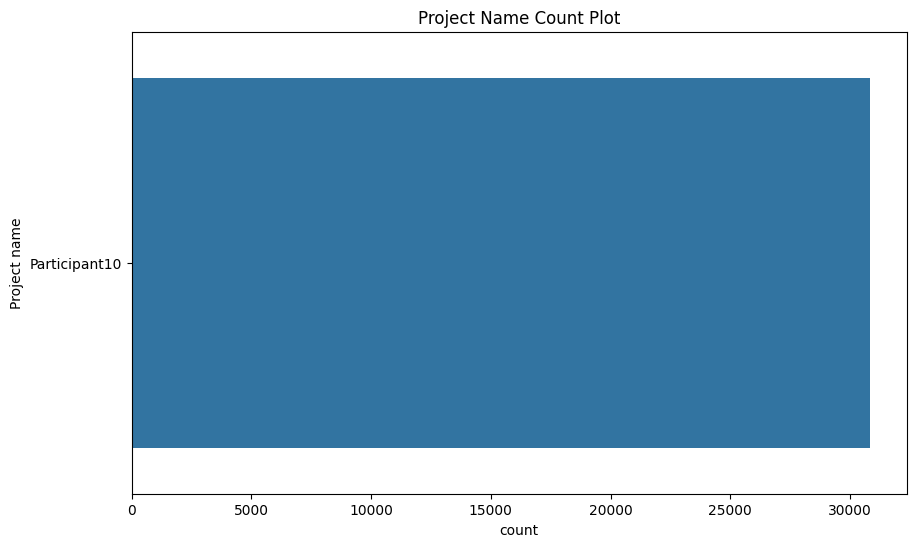

In [312]:
# bar plot for project name
plt.figure(figsize=(10,6))
sns.countplot(y='Project name', data=df)
plt.title('Project Name Count Plot')
plt.show()

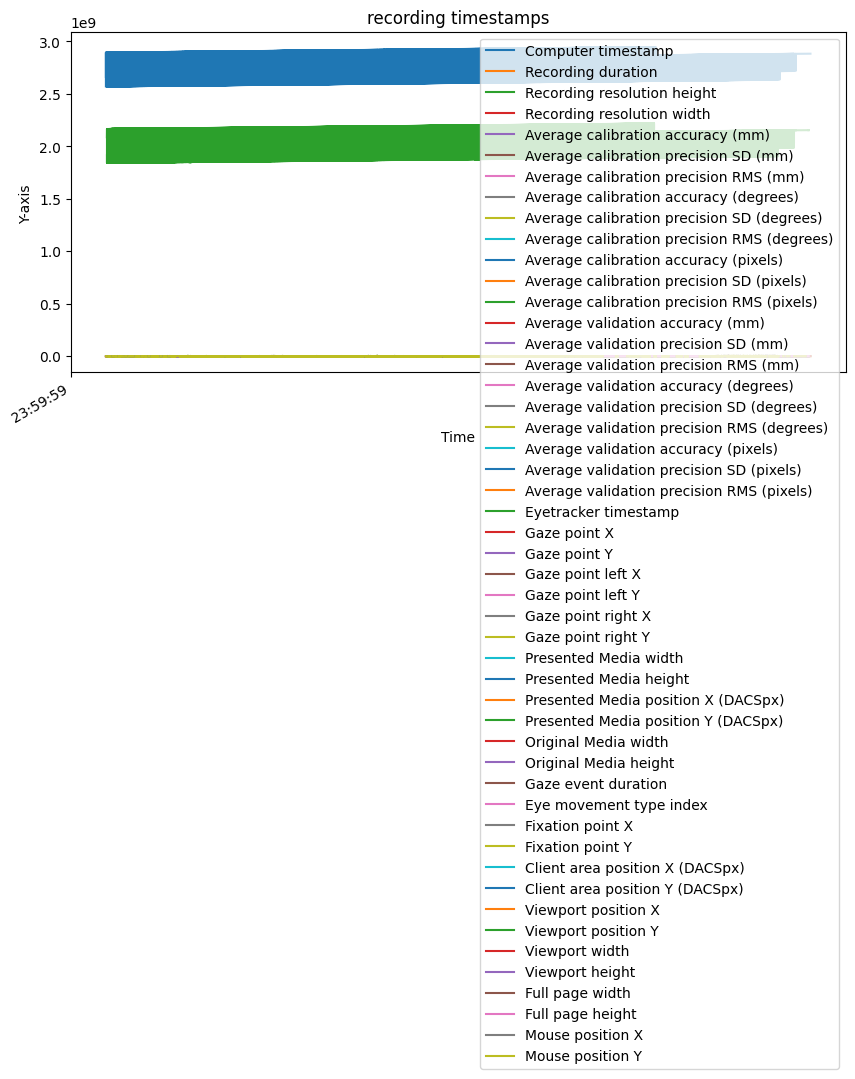

In [313]:
# convert the 'Recording timestamp' column to datetime
df['Recording timestamp'] = pd.to_datetime(df['Recording timestamp'])

# set the 'Recording timestamp' column as the index of the DataFrame
df.set_index('Recording timestamp', inplace=True)

# plot the time series
df.plot(figsize=(10, 5))

# add labels and title to the plot
plt.xlabel('Time')
plt.ylabel('Y-axis ')
plt.title('recording timestamps')

# show the plot
plt.show()

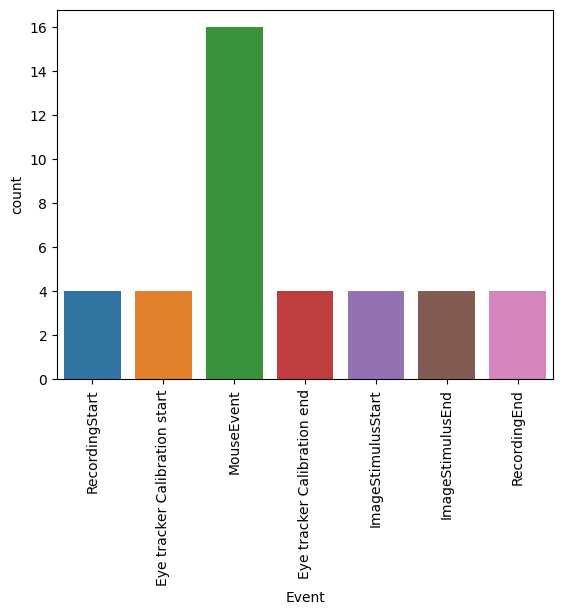

In [314]:
# event count
sns.countplot(x='Event', data=df)
plt.xticks(rotation=90)
plt.show()

<Axes: >

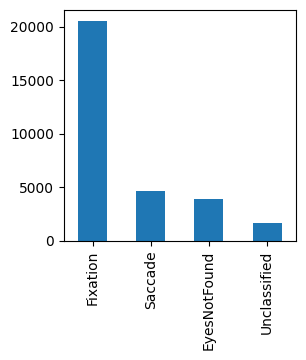

In [315]:
# bar plot for eye movement type
df['Eye movement type'].value_counts().plot.bar(figsize=(3,3))

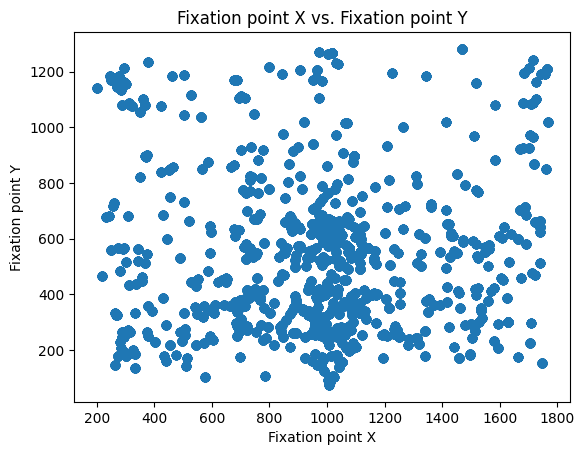

In [316]:
# create scatter plot for fixation point X vs Fixation point Y
plt.scatter(df['Fixation point X'], df['Fixation point Y'])

# set plot title and axis labels
plt.title('Fixation point X vs. Fixation point Y')
plt.xlabel('Fixation point X')
plt.ylabel('Fixation point Y')

# display plot
plt.show()

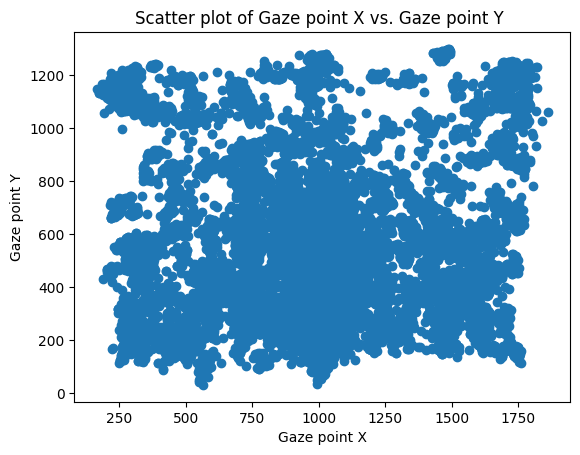

In [317]:
# create scatter plot for Gaze point X vs Gaze point Y
plt.scatter(df['Gaze point X'], df['Gaze point Y'])
plt.xlabel('Gaze point X')
plt.ylabel('Gaze point Y')
plt.title('Scatter plot of Gaze point X vs. Gaze point Y ')
plt.show()

**Data Cleaning**

In [318]:
df.columns

Index(['Computer timestamp', 'Sensor', 'Project name', 'Export date',
       'Participant name', 'Recording name', 'Recording date',
       'Recording date UTC', 'Recording start time',
       'Recording start time UTC', 'Recording duration', 'Timeline name',
       'Recording Fixation filter name', 'Recording software version',
       'Recording resolution height', 'Recording resolution width',
       'Recording monitor latency', 'Average calibration accuracy (mm)',
       'Average calibration precision SD (mm)',
       'Average calibration precision RMS (mm)',
       'Average calibration accuracy (degrees)',
       'Average calibration precision SD (degrees)',
       'Average calibration precision RMS (degrees)',
       'Average calibration accuracy (pixels)',
       'Average calibration precision SD (pixels)',
       'Average calibration precision RMS (pixels)',
       'Average validation accuracy (mm)',
       'Average validation precision SD (mm)',
       'Average validation preci

In [319]:
# find columns with more than 50% null values
null_percent = df.isnull().sum()/len(df) * 100
# columns to drop
cols_to_drop = null_percent[null_percent >= 50].index

print("Columns to drop are:")
print(cols_to_drop)

Columns to drop are:
Index(['Average calibration accuracy (mm)',
       'Average calibration precision SD (mm)',
       'Average calibration precision RMS (mm)',
       'Average calibration accuracy (degrees)',
       'Average calibration precision SD (degrees)',
       'Average calibration precision RMS (degrees)',
       'Average calibration accuracy (pixels)',
       'Average calibration precision SD (pixels)',
       'Average calibration precision RMS (pixels)',
       'Average validation accuracy (mm)',
       'Average validation precision SD (mm)',
       'Average validation precision RMS (mm)',
       'Average validation accuracy (degrees)',
       'Average validation precision SD (degrees)',
       'Average validation precision RMS (degrees)',
       'Average validation accuracy (pixels)',
       'Average validation precision SD (pixels)',
       'Average validation precision RMS (pixels)', 'Event', 'Event value',
       'Pupil diameter left', 'Pupil diameter right',
       'Cl

In [320]:
#  drop the columns
df.drop(cols_to_drop, axis=1, inplace=True)

In [321]:
# drop the columns with single value thorughout the dataset
# loop through the columns and find the each column having a single value
for col in df.columns:
    if len(df[col].unique()) == 1:
      # drop that column
        df.drop(col,inplace=True,axis=1)

In [322]:
# lets see how many null values are there
df.isna().sum()

Computer timestamp                         0
Sensor                                    40
Recording name                             0
Recording start time                       0
Recording start time UTC                   0
Recording duration                         0
Eyetracker timestamp                     816
Gaze point X                            4621
Gaze point Y                            4621
Gaze point left X                       5773
Gaze point left Y                       5773
Gaze point right X                      7874
Gaze point right Y                      7874
Gaze direction left X                   5773
Gaze direction left Y                   5773
Gaze direction left Z                   5773
Gaze direction right X                  7874
Gaze direction right Y                  7874
Gaze direction right Z                  7874
Validity left                            816
Validity right                           816
Eye position left X (DACSmm)            5773
Eye positi

In [323]:
# Filling missing value. We have both numerical and categorical data, dropping null values will reduce the data but
# according to some columns I have decided to keep that and instead of dropping categorical null replacing it by "unknown" word

# Fill missing values of categorical data columns with "unknown"
object_cols = df.select_dtypes(include=['object']).columns
df[object_cols] = df[object_cols].fillna(df[object_cols].mode().iloc[0])
    
# Select only the numeric columns from the dataframe
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Impute missing values with the mean of the respective numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [324]:
# checking null values now
df.isna().sum()

Computer timestamp                     0
Sensor                                 0
Recording name                         0
Recording start time                   0
Recording start time UTC               0
Recording duration                     0
Eyetracker timestamp                   0
Gaze point X                           0
Gaze point Y                           0
Gaze point left X                      0
Gaze point left Y                      0
Gaze point right X                     0
Gaze point right Y                     0
Gaze direction left X                  0
Gaze direction left Y                  0
Gaze direction left Z                  0
Gaze direction right X                 0
Gaze direction right Y                 0
Gaze direction right Z                 0
Validity left                          0
Validity right                         0
Eye position left X (DACSmm)           0
Eye position left Y (DACSmm)           0
Eye position left Z (DACSmm)           0
Eye position rig

array([[<Axes: title={'center': 'Computer timestamp'}>,
        <Axes: title={'center': 'Recording duration'}>,
        <Axes: title={'center': 'Eyetracker timestamp'}>,
        <Axes: title={'center': 'Gaze point X'}>],
       [<Axes: title={'center': 'Gaze point Y'}>,
        <Axes: title={'center': 'Gaze point left X'}>,
        <Axes: title={'center': 'Gaze point left Y'}>,
        <Axes: title={'center': 'Gaze point right X'}>],
       [<Axes: title={'center': 'Gaze point right Y'}>,
        <Axes: title={'center': 'Presented Media width'}>,
        <Axes: title={'center': 'Presented Media height'}>,
        <Axes: title={'center': 'Presented Media position X (DACSpx)'}>],
       [<Axes: title={'center': 'Presented Media position Y (DACSpx)'}>,
        <Axes: title={'center': 'Original Media width'}>,
        <Axes: title={'center': 'Original Media height'}>,
        <Axes: title={'center': 'Gaze event duration'}>],
       [<Axes: title={'center': 'Eye movement type index'}>,
    

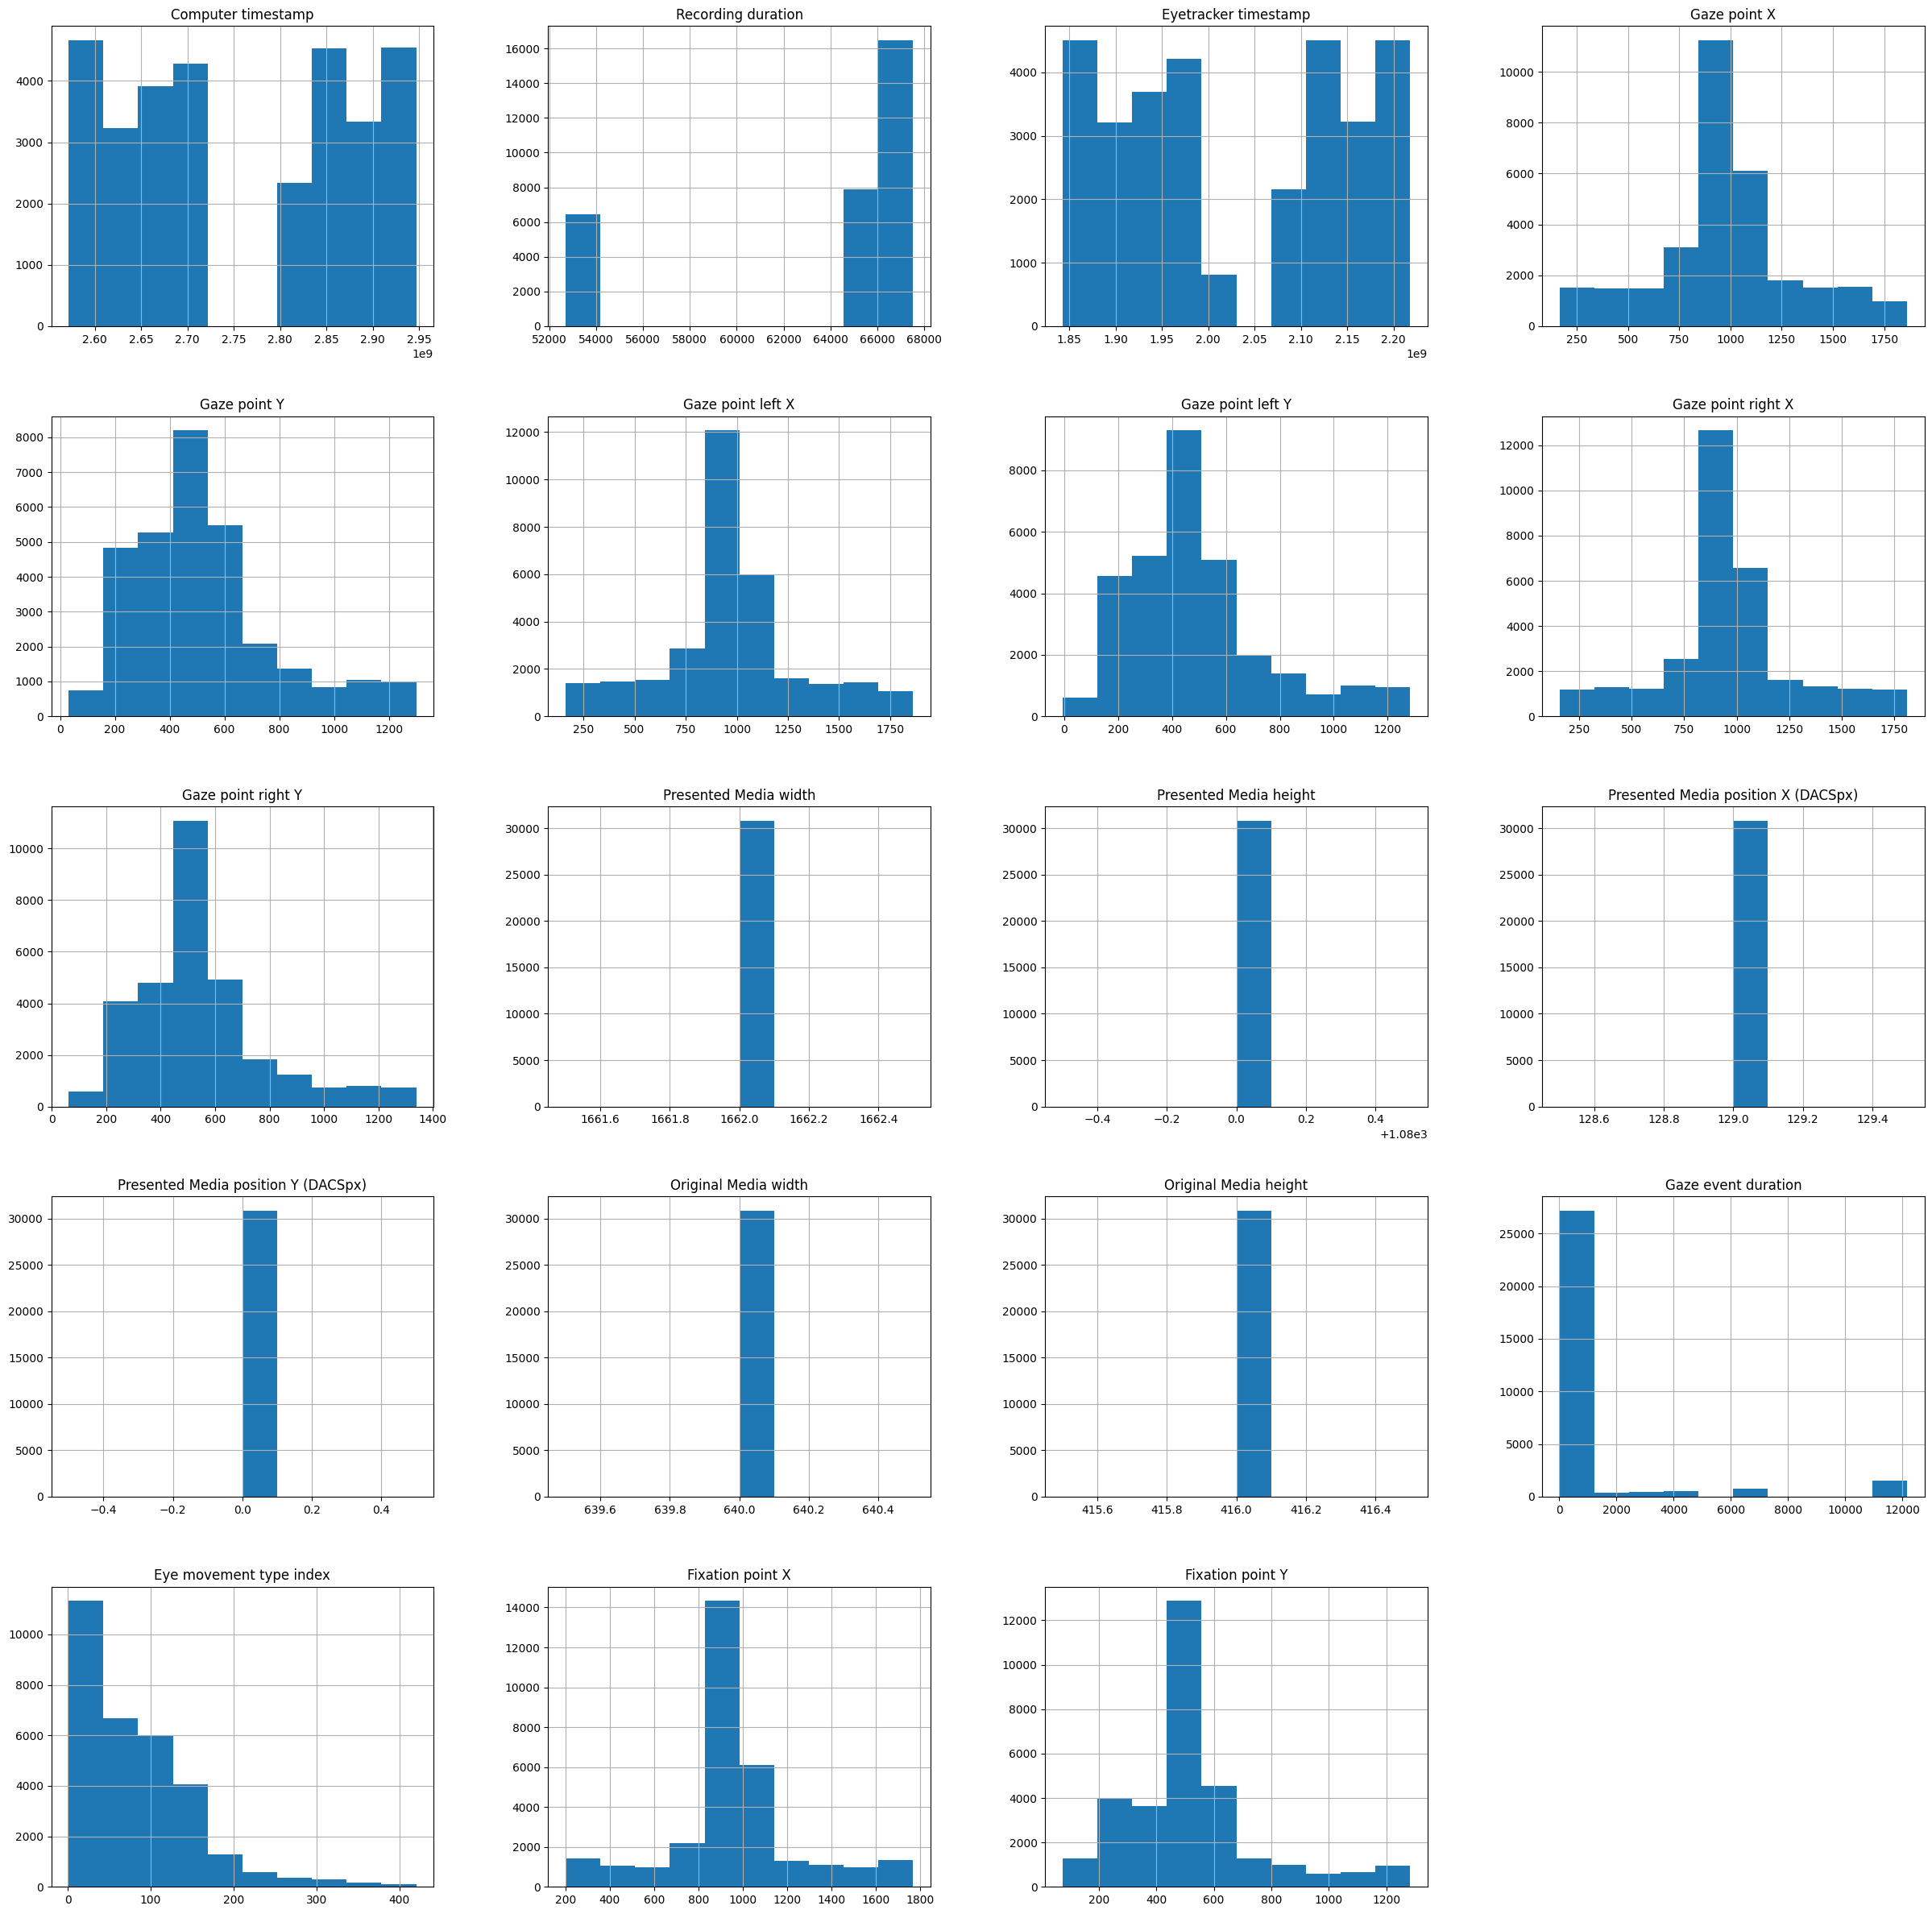

In [325]:
df.hist(figsize=(30,30))

**Correlation Analysis** 

In [326]:
# Select only the numeric columns from the dataframe
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Impute missing values with the mean of the respective numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


In [327]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Perform multicollinearity analysis on the float datatype columns
float_cols = df.select_dtypes(exclude=['object']).columns
X = df[float_cols].dropna()
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [328]:
 X.corr()

,Computer timestamp,Recording duration,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze point left X,Gaze point left Y,Gaze point right X,Gaze point right Y,Presented Media width,Presented Media height,Presented Media position X (DACSpx),Presented Media position Y (DACSpx),Original Media width,Original Media height,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y
Computer timestamp,1.000000,-0.519689,0.986286,0.015895,0.155913,0.022808,0.157697,0.017096,0.194144,NaN,NaN,NaN,NaN,NaN,NaN,0.352568,-0.031983,0.004511,0.155328
Recording duration,-0.519689,1.000000,-0.511615,-0.027060,-0.092069,-0.033645,-0.091045,-0.031614,-0.061119,NaN,NaN,NaN,NaN,NaN,NaN,-0.332540,0.167609,-0.029285,-0.069940
Eyetracker timestamp,0.986286,-0.511615,1.000000,0.016116,0.158081,0.023125,0.159890,0.017333,0.196843,NaN,NaN,NaN,NaN,NaN,NaN,0.344666,-0.038191,0.009350,0.161102
Gaze point X,0.015895,-0.027060,0.016116,1.000000,0.034278,0.975302,0.023327,0.921186,0.046717,NaN,NaN,NaN,NaN,NaN,NaN,0.004467,0.028553,0.855924,0.018368
Gaze point Y,0.155913,-0.092069,0.158081,0.034278,1.000000,0.021966,0.980239,0.049920,0.919650,NaN,NaN,NaN,NaN,NaN,NaN,-0.002595,-0.130389,0.020207,0.852095
Gaze point left X,0.022808,-0.033645,0.023125,0.975302,0.021966,1.000000,0.018510,0.889759,0.035558,NaN,NaN,NaN,NaN,NaN,NaN,0.005535,0.030966,0.833661,0.008495
Gaze point left Y,0.157697,-0.091045,0.159890,0.023327,0.980239,0.018510,1.000000,0.037534,0.897649,NaN,NaN,NaN,NaN,NaN,NaN,-0.002768,-0.119633,0.007247,0.839836
Gaze point right X,0.017096,-0.031614,0.017333,0.921186,0.049920,0.889759,0.037534,1.000000,0.056946,NaN,NaN,NaN,NaN,NaN,NaN,0.006574,-0.009656,0.831283,0.037532
Gaze point right Y,0.194144,-0.061119,0.196843,0.046717,0.919650,0.035558,0.897649,0.056946,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-0.004956,-0.045200,0.037044,0.824275
Presented Media width,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


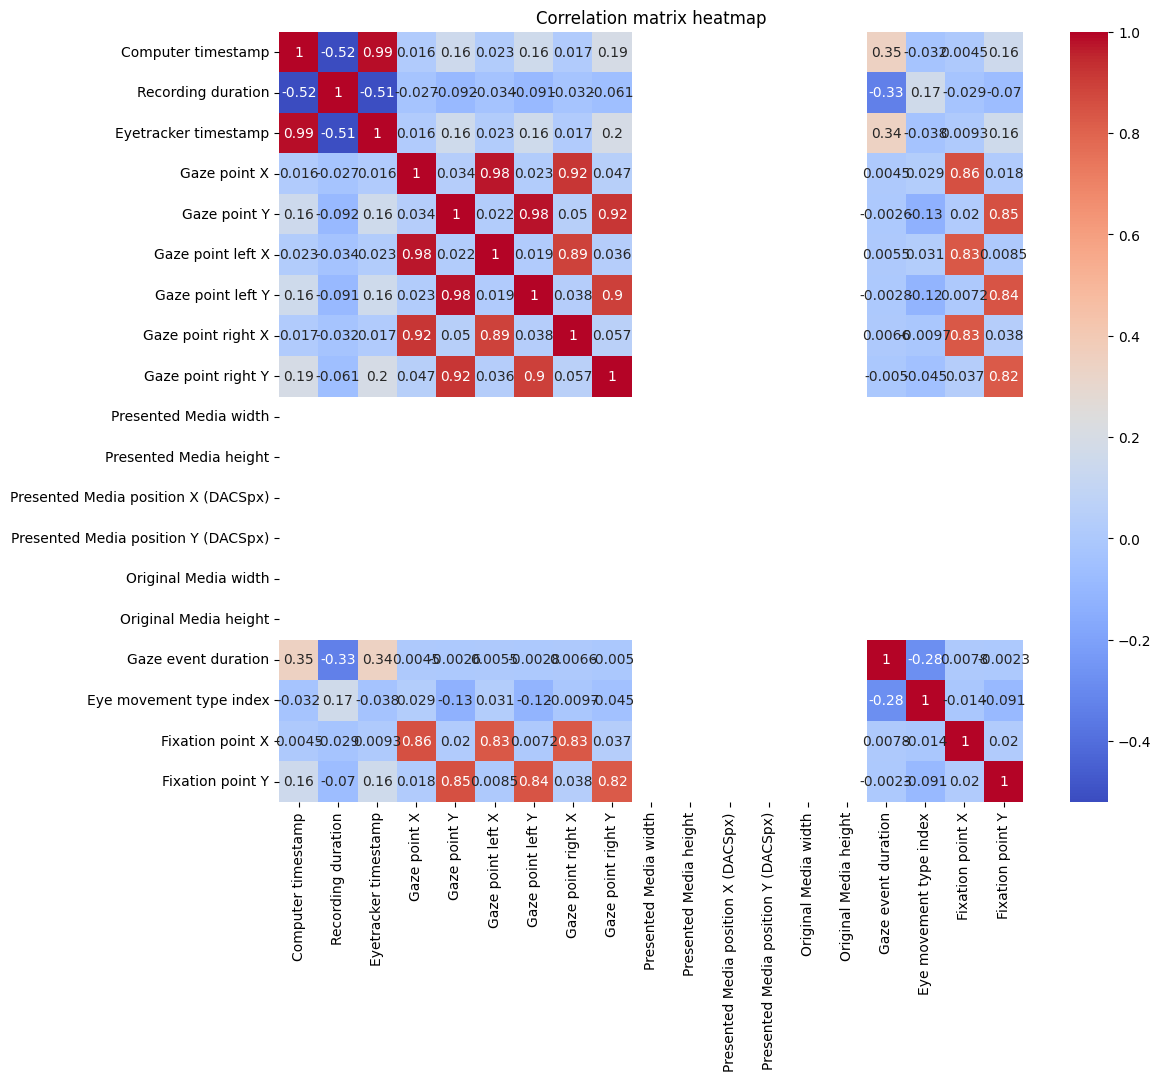

In [329]:
# Plot heatmap of correlation matrix for float datatype columns
corr = X.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation matrix heatmap')

plt.show()

In [330]:
print(df[["Fixation point X","Gaze point right X"]].corr())
print(df[["Gaze point left X","Fixation point X"]].corr())

                    Fixation point X  Gaze point right X
Fixation point X            1.000000            0.831283
Gaze point right X          0.831283            1.000000
                   Gaze point left X  Fixation point X
Gaze point left X           1.000000          0.833661
Fixation point X            0.833661          1.000000


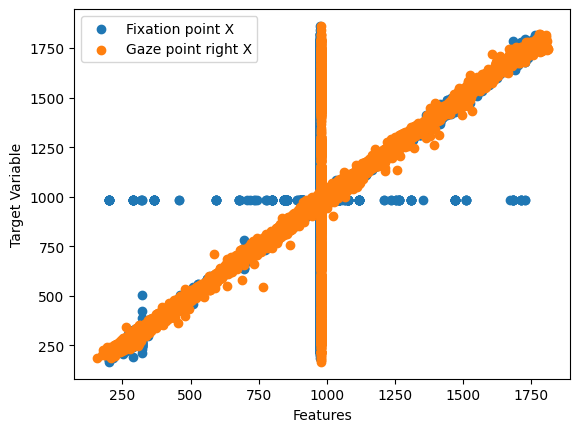

In [331]:
# Plot scatter plot
plt.scatter(df['Fixation point X'], df['Gaze point X'], label='Fixation point X')
plt.scatter(df['Gaze point right X'], df['Gaze point X'], label='Gaze point right X')
plt.xlabel('Features')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

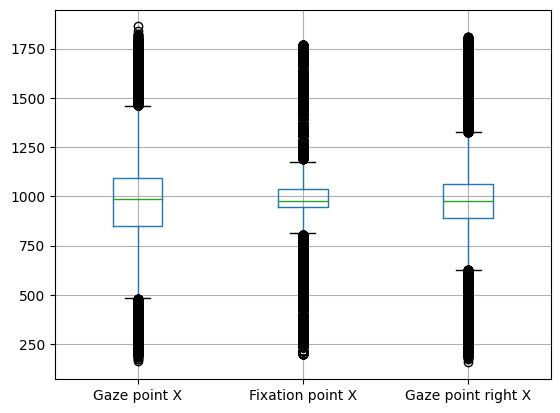

In [332]:
# Plot box plot
df.boxplot(column=['Gaze point X','Fixation point X', 'Gaze point right X'])
plt.show()

In [299]:
# here we can clean more data by dropping highly correlated columns

# find highly correlated features
highly_correlated = []
threshold = 0.7
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            colname = corr.columns[i]
            highly_correlated.append(colname)

In [300]:
print('Highly correlated columns are:')
highly_correlated

Highly correlated columns are:


['Eyetracker timestamp',
 'Gaze point left X',
 'Gaze point left Y',
 'Gaze point right X',
 'Gaze point right X',
 'Gaze point right Y',
 'Gaze point right Y',
 'Fixation point X',
 'Fixation point X',
 'Fixation point X',
 'Fixation point Y',
 'Fixation point Y',
 'Fixation point Y']

In [301]:
# remove highly correlated features
df = df.drop(columns=highly_correlated)

In [302]:
# dataframe now
df

,Computer timestamp,Sensor,Recording name,Recording start time,Recording start time UTC,Recording duration,Gaze point X,Gaze point Y,Gaze direction left X,Gaze direction left Y,...,Presented Media height,Presented Media position X (DACSpx),Presented Media position Y (DACSpx),Original Media width,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X (MCSnorm),Fixation point Y (MCSnorm)
Recording timestamp,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000000000,2571560480,Eye Tracker,Recording1,14:02:15.450,13:02:15.450,64561,985.043508,529.645256,"0,03609","0,00060",...,1080.0,129.0,0.0,640.0,416.0,Fixation,1162.801104,82.424444,"0,5704","0,5250"
1970-01-01 00:00:00.000101893,2571662373,Eye Tracker,Recording1,14:02:15.450,13:02:15.450,64561,985.043508,529.645256,"0,03609","0,00060",...,1080.0,129.0,0.0,640.0,416.0,EyesNotFound,8.000000,1.000000,"0,5704","0,5250"
1970-01-01 00:00:00.000110254,2571670734,Eye Tracker,Recording1,14:02:15.450,13:02:15.450,64561,1037.000000,1225.000000,"0,05680","0,37712",...,1080.0,129.0,0.0,640.0,416.0,Fixation,75.000000,1.000000,"0,5704","0,5250"
1970-01-01 00:00:00.000118587,2571679067,Eye Tracker,Recording1,14:02:15.450,13:02:15.450,64561,1022.000000,1229.000000,"0,05709","0,38066",...,1080.0,129.0,0.0,640.0,416.0,Fixation,75.000000,1.000000,"0,5704","0,5250"
1970-01-01 00:00:00.000126931,2571687411,Eye Tracker,Recording1,14:02:15.450,13:02:15.450,64561,1039.000000,1231.000000,"0,05881","0,38179",...,1080.0,129.0,0.0,640.0,416.0,Fixation,75.000000,1.000000,"0,5704","0,5250"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.052531320,2946671899,Eye Tracker,Recording4,14:07:38.020,13:07:38.020,52697,985.043508,529.645256,"0,03609","0,00060",...,1080.0,129.0,0.0,640.0,416.0,EyesNotFound,12156.000000,27.000000,"0,5704","0,5250"
1970-01-01 00:00:00.052543311,2946683890,Eye Tracker,Recording4,14:07:38.020,13:07:38.020,52697,985.043508,529.645256,"0,03609","0,00060",...,1080.0,129.0,0.0,640.0,416.0,Fixation,1162.801104,82.424444,"0,5704","0,5250"
1970-01-01 00:00:00.052543311,2946683890,Mouse,Recording4,14:07:38.020,13:07:38.020,52697,985.043508,529.645256,"0,03609","0,00060",...,1080.0,129.0,0.0,640.0,416.0,Fixation,1162.801104,82.424444,"0,5704","0,5250"


**Feature Engineerin**

In [241]:
# now perform one hot encoding on this cleaned data and then again perform PCA 
# I will use LSTM and decision tree regressor to find out which one will give us good results

In [242]:
# import the necessary 
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [243]:
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack

In [244]:
# separate categorical and numerical features
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns


In [245]:
# Standardize numerical data
num_scaler = MinMaxScaler()
num_data = num_scaler.fit_transform(df[numerical_cols])


In [ ]:
# As we have a categorical data we need to perform one hot encoding on it
# Here I am using OneHotEncoder() funciton from the sklearn preprocessing package
# One-hot encode categorical data
cat_encoder = OneHotEncoder(sparse=True)
cat_data = cat_encoder.fit_transform(df[categorical_cols])


In [247]:
# Combine numerical and categorical data
combined_data = np.hstack((num_data, cat_data.toarray()))


In [248]:
combined_data

array([[0.        , 0.4195632 , 0.255805  , ..., 0.        , 0.        ,
        0.        ],
       [0.00418279, 0.4195632 , 0.255805  , ..., 0.        , 0.        ,
        0.        ],
       [0.00452601, 0.44937177, 0.94791667, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.99931457, 0.16186253, 0.20265152, ..., 0.        , 0.        ,
        0.        ],
       [0.99965796, 0.16555802, 0.20643939, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.16851441, 0.20170455, ..., 0.        , 0.        ,
        0.        ]])

In [249]:
# PCA
pca = PCA(n_components=10)
pca_data = pca.fit_transform(combined_data)

# print pca_data
pca_data

array([[ 3.38600315e+00,  1.30792223e-01,  1.22574771e+00, ...,
         4.16851854e-01, -7.17038383e-02,  1.37915878e-01],
       [ 3.82798393e+00,  6.55311058e-01,  1.40994762e+00, ...,
        -8.07482836e-02, -6.37162375e-02, -5.64842424e-03],
       [ 7.53399785e-01, -1.33399748e+00, -1.03415236e+00, ...,
         7.68757803e-01, -1.55274462e-01,  1.78193417e-01],
       ...,
       [-1.24762540e+00,  1.97392727e-01,  2.08888427e-01, ...,
         3.06600702e-02, -5.65430121e-02, -3.91771918e-03],
       [-1.24973828e+00,  2.00100550e-01,  2.10941707e-01, ...,
         2.62255095e-02, -7.43471520e-02,  5.84968563e-03],
       [-1.24868417e+00,  1.99619703e-01,  2.10235272e-01, ...,
         2.75782381e-02, -3.99071323e-02, -1.94477845e-03]])

**LSTM**

In [250]:
# Split into train and test sets
train_size = int(len(pca_data) * 0.8)
train_data, test_data = pca_data[0:train_size,:], pca_data[train_size:len(df),:]


In [333]:
# Convert data to time series format

# This function creates a time series dataset where the X values are a sequence of time steps and the y value
# is the next time step after the sequence.
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        # Take a sequence of time_steps from X starting at i
        # and append it to the input sequences Xs.
        Xs.append(X[i:(i+time_steps), :])
        # Take the next value in the target dataset y and append it to the target values ys.
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)


In [252]:
time_steps = 10 # flexible
# declare the  train and test data
X_train, y_train = create_dataset(train_data, train_data, time_steps)
X_test, y_test = create_dataset(test_data, test_data, time_steps)


In [253]:
# Build LSTM model
model = Sequential()

# Add an LSTM layer with 64 units/neurons, and set the input shape to match the shape of the training data
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))

# Add a Dense layer with 64 units/neurons and relu activation function
model.add(Dense(64, activation='relu'))

# Add a Dense layer with number of units equal to the number of features in the training data
model.add(Dense(X_train.shape[2]))

# Compile the model with the Adam optimizer and mean squared error loss function
model.compile(optimizer='adam', loss='mse')


In [267]:
# Train the model
history=model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=1)


Epoch 1/10
154/154 [==============================] - 4s 27ms/step - loss: 0.1311
Epoch 2/10
154/154 [==============================] - 2s 16ms/step - loss: 0.1298
Epoch 3/10
154/154 [==============================] - 2s 14ms/step - loss: 0.1268
Epoch 4/10
154/154 [==============================] - 2s 12ms/step - loss: 0.1267
Epoch 5/10
154/154 [==============================] - 1s 8ms/step - loss: 0.1243
Epoch 6/10
154/154 [==============================] - 1s 8ms/step - loss: 0.1231
Epoch 7/10
154/154 [==============================] - 1s 9ms/step - loss: 0.1217
Epoch 8/10
154/154 [==============================] - 2s 16ms/step - loss: 0.1191
Epoch 9/10
154/154 [==============================] - 3s 17ms/step - loss: 0.1181
Epoch 10/10
154/154 [==============================] - 2s 12ms/step - loss: 0.1172


In [268]:
# Make predictions on test set
y_pred = model.predict(X_test)


19/19 [==============================] - 0s 3ms/step


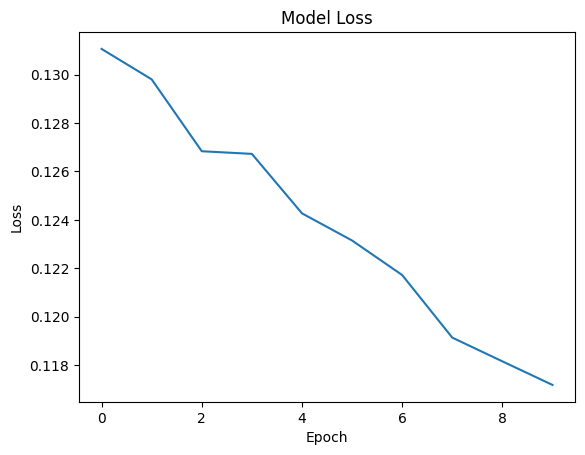

In [270]:
import matplotlib.pyplot as plt
# Plot training and validation loss as a function of epochs
# Plot epoch vs loss graph
plt.plot(history.history['loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [256]:
# # Reshape y_test and y_pred to 2D arrays
# y_test = y_test.reshape(-1, pca_data.shape[1])
# y_pred = y_pred.reshape(-1, pca_data.shape[1])


In [257]:
# # Inverse transform the predictions and true values
# y_pred = scaler.inverse_transform(y_pred)
# y_test = scaler.inverse_transform(y_test)


In [258]:
# Calculate MSE and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


In [259]:
# Print scores
print('MSE:', mse)
print('MAE:', mae)


MSE: 0.13060836967902412
MAE: 0.18313415242046716


Decision Tree Regressor

In [260]:
# Build Decision Tree Regressor model
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train.reshape(X_train.shape[0], -1), y_train.reshape(y_train.shape[0], -1))


DecisionTreeRegressor()

In [261]:
# Make predictions on test set
y_pred_tree = tree_model.predict(X_test.reshape(X_test.shape[0], -1))


In [262]:
# Calculate MSE and MAE
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)


In [263]:
# Print scores
print('Decision Tree MSE:', mse_tree)
print('Decision Tree MAE:', mae_tree)

Decision Tree MSE: 1.0829648637057891
Decision Tree MAE: 0.6567069434340477


In [264]:
# Print scores
print('MSE and MAE scores of both models we used...')
print('LSTM MSE:', mse)
print('LSTM MAE:', mae)
print('Decision Tree MSE:', mse_tree)
print('Decision Tree MAE:', mae_tree)

MSE and MAE scores of both models we used...
LSTM MSE: 0.13060836967902412
LSTM MAE: 0.18313415242046716
Decision Tree MSE: 1.0829648637057891
Decision Tree MAE: 0.6567069434340477
